In [1]:
import MapGrabber as MG
import glob
import numpy as np
import cv2
from scipy.ndimage import imread
from matplotlib import pyplot as plt
%matplotlib inline

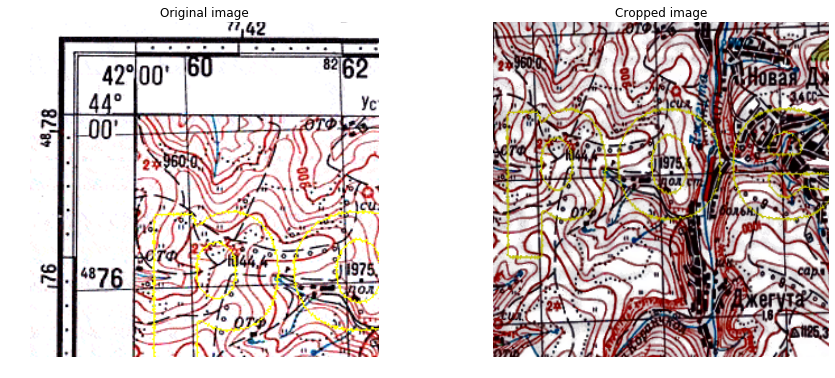

In [2]:
img_fps = glob.glob('.\\k38_lom_imgs\\*.gif')
img = imread(img_fps[0])
cimg = MG.crop_border(img)
f, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(img[:256, :266]); axs[0].set_title('Original image'); axs[0].axis('off');
axs[1].imshow(cimg[:300, :300]); axs[1].set_title('Cropped image'); axs[1].axis('off');

In [3]:
dst_fps = []
for fp in img_fps:
    #img = imread(fp)
    #dst_img = cv2.cvtColor(MG.crop_border(img), cv2.COLOR_BGR2RGB)
    dst_fps.append('./k38_lom_cropped/' + fp.split('\\')[-1][:-4] + '.png')
    #cv2.imwrite(dst_fps[-1], dst_img)

In [5]:
for i in range(0, 12):
    agg_img = cv2.imread(dst_fps[i*12])
    for fp in dst_fps[(i*12)+1:(i*12)+12]:
        app_img = cv2.imread(fp)
        height = max(agg_img.shape[0], app_img.shape[0])
        app_img = cv2.resize(app_img, (app_img.shape[1], height))
        agg_img = cv2.resize(agg_img, (agg_img.shape[1], height))
        agg_img = np.hstack([agg_img, app_img])
    cv2.imwrite('Row_'+str(i+1)+'.png', agg_img, (cv2.IMWRITE_PNG_COMPRESSION, 9))

In [6]:
row_fps = ['Row_'+str(i)+'.png' for i in range(1, 13)]

In [8]:
agg_rows = cv2.imread(row_fps[0])

for fp in row_fps[1:2]:
    app_row = cv2.imread(fp)
    width = max(agg_rows.shape[1], app_row.shape[1])
    app_row = cv2.resize(app_row, (width, app_row.shape[0]))
    agg_rows = cv2.resize(agg_rows, (width, agg_rows.shape[0]))
    agg_rows = np.vstack([agg_rows, app_row])
cv2.imwrite('Full_grid.png', agg_rows, (cv2.IMWRITE_PNG_COMPRESSION, 9))

True